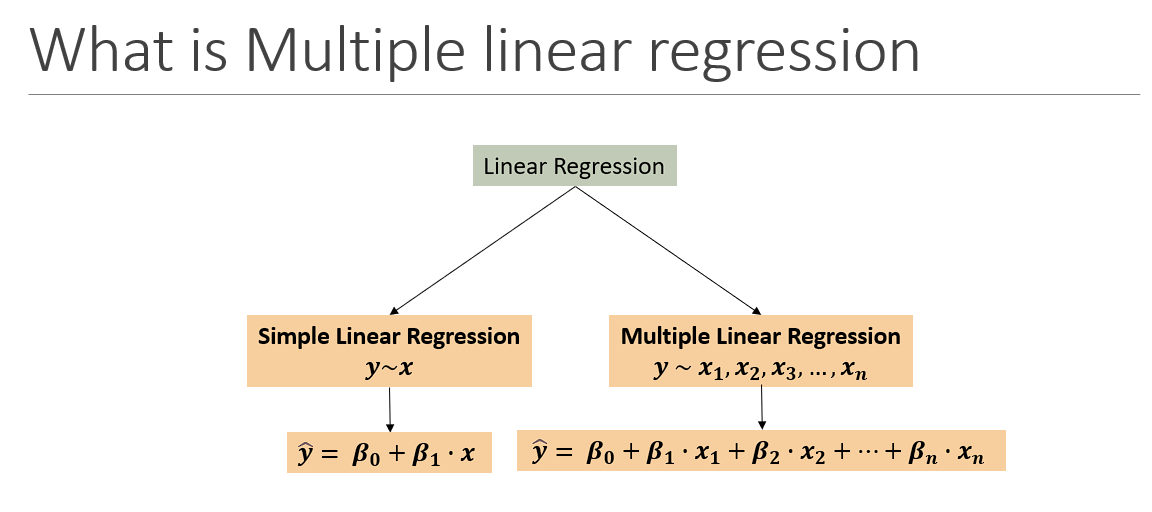

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.chdir('D:/ETLHIVE/Datasets/')

In [3]:
## Load datasets
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RND,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
ADMIN,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
MKT,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
PROFIT,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [8]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

### Seperate x and y features

In [11]:
x = df.drop(columns=['STATE','PROFIT'])
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [13]:
y = df[['PROFIT']]
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Build Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

### Check model intercept and coeff

In [15]:
model.intercept_

array([50122.19298987])

In [16]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [17]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

### PROFIT_pred = 50122.19 + 0.8057xRND -0.0268xADMIN + 0.0272xMKT
1. RND increases by 1000 , PROFIT will increase by 805.7
2. ADMIN increases byt 1000, PROFIT will decrease by 26.8
3. MKT increases by 1000, PROFIT will increase by 27.2

### R2 score of model

In [18]:
model.score(x,y)

0.9507459940683246

### Predict the values x

In [21]:
ypred = model.predict(x)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [22]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Evalute based on different metrices
1. MSE
2. RMSE
3. MAE
4. R2 score

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
mse = mean_squared_error(y,ypred)
mse

78417126.01913084

In [26]:
rmse = mse**(1/2)
rmse

8855.344489015142

In [27]:
mae = mean_absolute_error(y,ypred)
mae

6471.45039610481

In [28]:
r2 = r2_score(y,ypred)
r2

0.9507459940683246

### Predicting new values

In [29]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [30]:
xnew = [[200000, 150000, 100000]]
pred = model.predict(xnew)
pred

array([[209965.61419388]])